In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
np.random.seed(42)
data = np.random.randint(1, 201, size=(100, 30))
df = pd.DataFrame(data, columns=[f"Col_{i+1}" for i in range(30)])

In [7]:
df = df.mask(df.map(lambda x: 10 <= x <= 60))
print(df)

    Col_1  Col_2  Col_3  Col_4  Col_5  Col_6  Col_7  Col_8  Col_9  Col_10  \
0   103.0  180.0   93.0    NaN  107.0   72.0  189.0    NaN  103.0   122.0   
1    89.0    NaN    NaN  170.0  188.0    NaN  190.0  190.0  175.0   190.0   
2    92.0  111.0  188.0  199.0  172.0    8.0  175.0    NaN   81.0   164.0   
3     NaN   82.0  111.0    NaN    NaN  154.0  188.0  124.0    NaN   157.0   
4   135.0   72.0    NaN  162.0    NaN    NaN  151.0   62.0    NaN    99.0   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
95  164.0  140.0   91.0    2.0  118.0    NaN  181.0  160.0   95.0   144.0   
96  174.0  113.0  120.0  149.0  122.0    NaN  119.0    NaN    NaN   175.0   
97    NaN    NaN   95.0  151.0   88.0    NaN    NaN  171.0  165.0   189.0   
98  129.0  108.0    5.0    3.0  193.0  132.0  104.0   64.0  106.0    98.0   
99  121.0    NaN   75.0  144.0   70.0    NaN  101.0  186.0  132.0   111.0   

    ...  Col_21  Col_22  Col_23  Col_24  Col_25  Col_26  Col_27  Col_28  \


In [9]:
row_na_count = df.isna().sum(axis=1)
col_na_count = df.isna().sum(axis=0)
print("Count of NaNs in each row:")
print(row_na_count)
print("\nCount of NaNs in each column:")
print(col_na_count)

Count of NaNs in each row:
0      7
1     11
2      8
3      9
4      8
      ..
95    10
96     9
97     9
98     7
99    10
Length: 100, dtype: int64

Count of NaNs in each column:
Col_1     23
Col_2     22
Col_3     21
Col_4     18
Col_5     26
Col_6     28
Col_7     23
Col_8     27
Col_9     21
Col_10    17
Col_11    26
Col_12    24
Col_13    23
Col_14    28
Col_15    23
Col_16    34
Col_17    31
Col_18    31
Col_19    34
Col_20    20
Col_21    24
Col_22    26
Col_23    23
Col_24    31
Col_25    27
Col_26    26
Col_27    31
Col_28    27
Col_29    31
Col_30    31
dtype: int64


In [11]:
df_filled = df.apply(lambda col: col.fillna(col.mean()), axis=0)

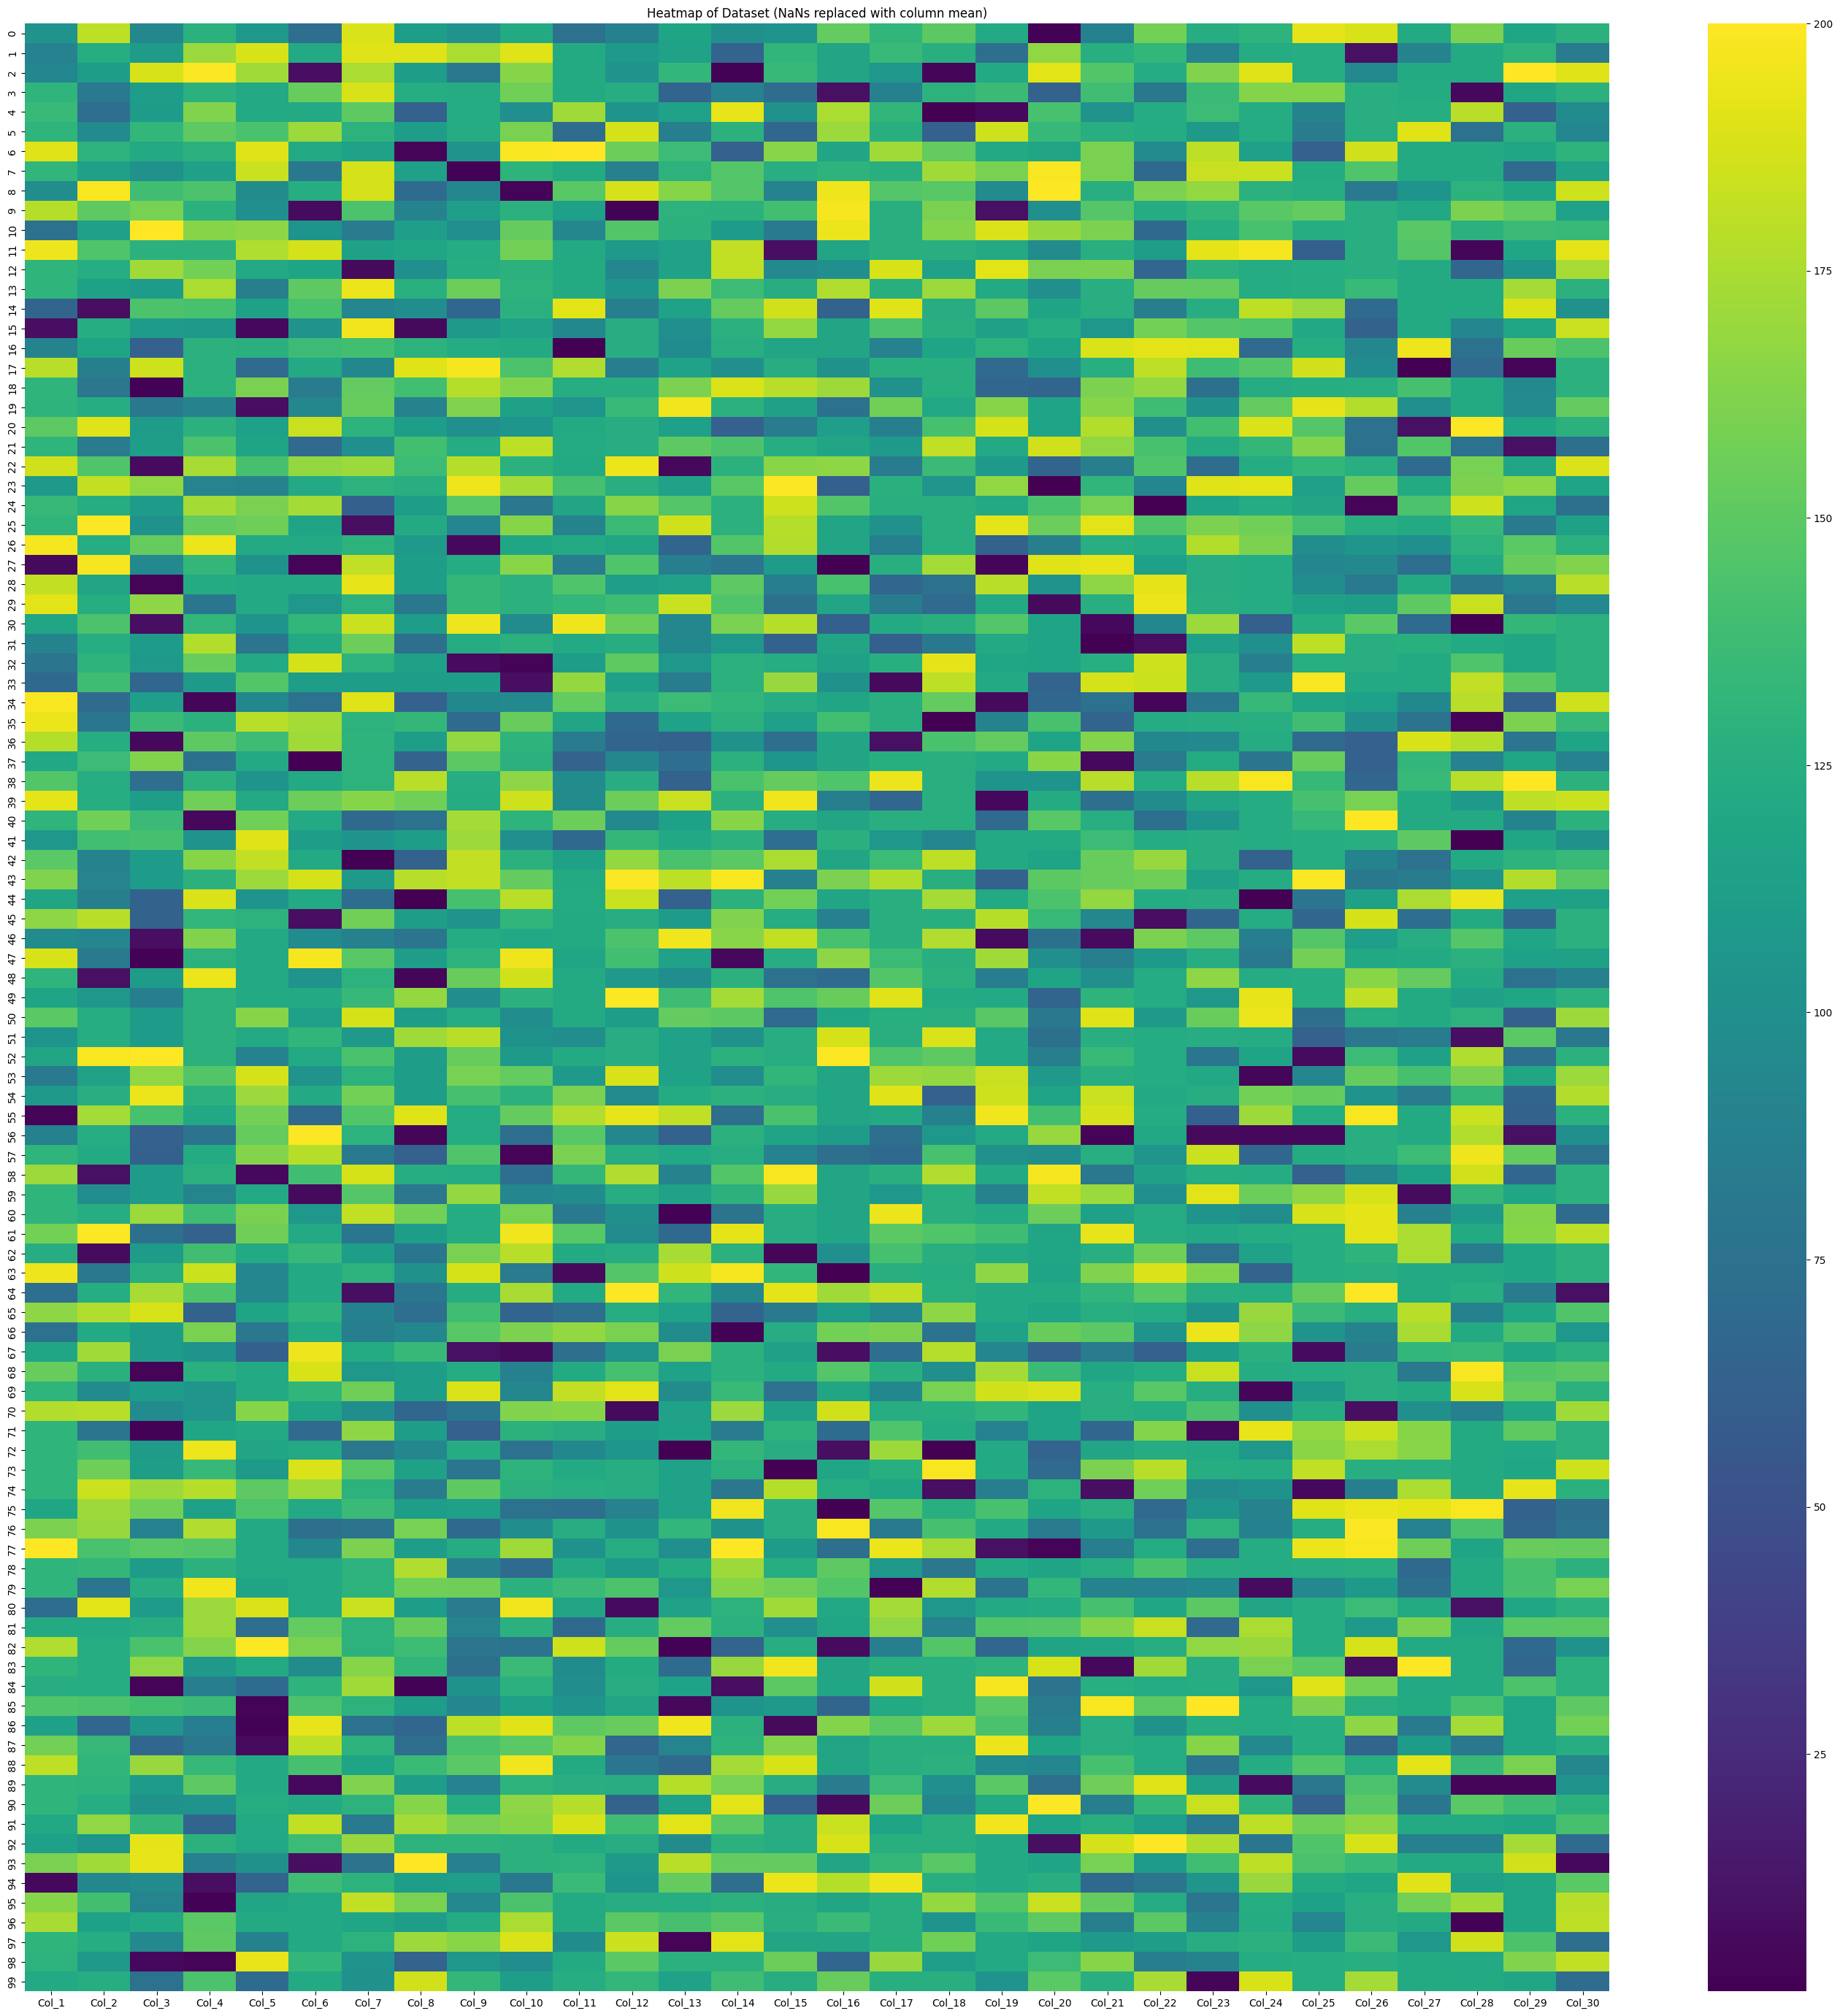

In [13]:
plt.figure(figsize=(35, 35))
sns.heatmap(df_filled, cmap="viridis")
plt.title("Heatmap of Dataset (NaNs replaced with column mean)")
plt.show()

In [17]:
corr_matrix = df_filled.corr()
low_corr_columns = (corr_matrix.abs() <= 0.7).all()
count_low_corr = low_corr_columns.sum()
print("Number of columns with correlation <= 0.7:", count_low_corr)

Number of columns with correlation <= 0.7: 0


In [19]:
df_norm = (df_filled - df_filled.min()) / (df_filled.max() - df_filled.min()) * 10
print("\nNormalized dataset (first 5 rows):\n", df_norm.head())


Normalized dataset (first 5 rows):
       Col_1     Col_2     Col_3      Col_4     Col_5     Col_6     Col_7  \
0  5.102041  8.963731  4.595960   6.385415  5.329949  3.585859  9.641026   
1  4.387755  6.085426  5.457742   8.527919  9.441624  6.064113  9.692308   
2  4.540816  5.388601  9.393939  10.000000  8.629442  0.353535  8.923077   
3  6.485555  3.886010  5.505051   6.385415  6.031006  7.727273  9.589744   
4  6.734694  3.367876  5.457742   8.121827  6.031006  6.064113  7.692308   

      Col_8     Col_9    Col_10  ...    Col_21    Col_22    Col_23    Col_24  \
0  5.514559  5.179487  6.102564  ...  4.416244  7.889447  6.161543  6.548223   
1  9.497487  8.871795  9.589744  ...  6.317125  6.582915  4.336735  6.233355   
2  5.514559  4.051282  8.256410  ...  7.360406  6.135407  8.061224  9.593909   
3  6.180905  6.233690  7.897436  ...  7.005076  4.020101  6.734694  8.223350   
4  3.065327  6.233690  4.923077  ...  5.177665  6.135407  6.785714  6.233355   

     Col_25    Col_26    

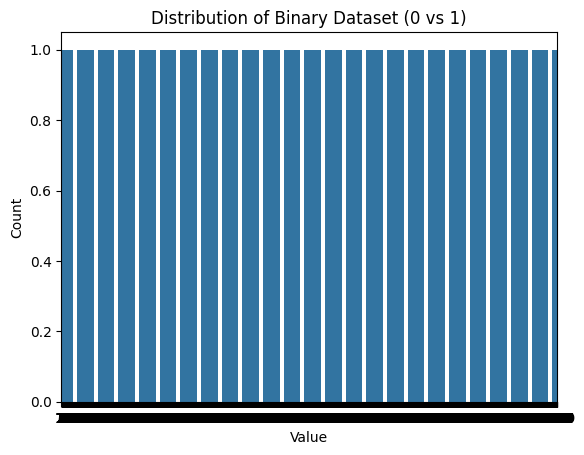

In [31]:
df_binary = df_norm.apply(lambda col: col.map(lambda x: 0 if x <= 5 else 1))
sns.countplot(df_binary.values.flatten())
plt.title("Distribution of Binary Dataset (0 vs 1)")
plt.xlabel("Value")
plt.ylabel("Count")
plt.show()